In [ ]:
#Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dl = pd.read_csv('/content/drive/My Drive/Portfolio/Airbnb data/listings.csv', encoding='ISO-8859-1')

pd.set_option('display.max_columns', None)
dl.head(5)

Mounted at /content/drive


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240906025355,2024-09-11,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",NaN,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,AlÃ©sia,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Observatoire,NaN,48.831910,2.318700,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$113.00,2,30,2,2,30,30,2.0,30.0,NaN,t,6,20,35,297,2024-09-11,4,0,0,2017-10-28,2019-10-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20240906025355,2024-09-13,city scrape,Your perfect Paris studio on Ãle Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Paris, France",We have spent a lot of time traveling for work...,within an hour,100%,94%,NaN,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,2.0,4.0,"['email', 'phone']",t,t,Neighborhood highlights,HÃ´tel-de-Ville,NaN,48.852470,2.358350,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",$95.00,2,730,2,2,1125,1125,2.0,1125.0,NaN,t,3,24,54,77,2024-09-13,413,57,2,2009-06-30,2024-09-01,4.61,4.64,4.59,4.81,4.84,4.96,4.59,7510402838018,f,1,1,0,0,2.23
2,7397,https://www.airbnb.com/rooms/7397,20240906025355,2024-09-06,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,2008-08-30,"Paris, France","I am a writer,54, author of novels, books of l...",within an hour,100%,67%,t,https://a0.muscache.com/im/pictures/user/ad6a9...,https://a0.muscache.com/im/pictures/user/ad6a9...,Le Marais,1.0,10.0,"['email', 'phone']",t,t,NaN,HÃ´tel-de-Ville,NaN,48.859090,2.353150,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",$145.00,10,130,2,10,130,130,9.9,130.0,NaN,t,6,30,49,316,2024-09-06,360,22,1,2011-04-08,2024-08-27,4.73,4.81,4.45,4.92,4.89,4.93,4.74,7510400829623,f,1,1,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20240906025355,2024-09-10,previous scrape,Sunny apartment with balc

#CLEANING

In [ ]:
#Overview valeurs manquantes

pd.set_option('display.max_rows', None)
print(dl.isna().sum())
pd.reset_option('display.max_rows', None)

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                      4076
neighborhood_overview                           47282
picture_url                                         2
host_id                                             0
host_url                                            0
host_name                                           6
host_since                                          6
host_location                                   19554
host_about                                      54426
host_response_time                              41089
host_response_rate                              41089
host_acceptance_rate                            30413
host_is_superhost           

In [ ]:
unique_neighborhoods = dl['neighbourhood_cleansed'].unique()
print(unique_neighborhoods)

['Observatoire' 'HÃ´tel-de-Ville' 'OpÃ©ra' 'Buttes-Chaumont' 'Ã\x89lysÃ©e'
 'EntrepÃ´t' 'Louvre' 'Popincourt' 'Buttes-Montmartre' 'Gobelins' 'Bourse'
 'MÃ©nilmontant' 'Passy' 'Reuilly' 'Vaugirard' 'Temple' 'PanthÃ©on'
 'Batignolles-Monceau' 'Luxembourg' 'Palais-Bourbon']


In [ ]:
dl.shape

(95461, 75)

In [ ]:
dl.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
#Garder ce qui nous interesse et peut etre utilisé

dlc = dl[['id',
#'listing_url',
#'scrape_id', 'last_scraped', 'source', 'name',
#'description', 'neighborhood_overview', 'picture_url',
    'host_id',
#'host_url', 'host_name',
    'host_since',
#'host_location',
#'host_about',
#'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost',
#'host_thumbnail_url', 'host_picture_url',
#'host_neighbourhood', 'host_listings_count',
#'host_total_listings_count',
#'host_verifications',
#'host_has_profile_pic',
    'host_identity_verified',
#'neighbourhood',
       'neighbourhood_cleansed',
#'neighbourhood_group_cleansed', 'latitude','longitude',
          'property_type', 'room_type', 'accommodates',
#'bathrooms',
#'bathrooms_text',
    'bedrooms',
#'beds',
#'amenities',
    'price',

#'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
#  'maximum_minimum_nights', 'minimum_maximum_nights',
# 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
#'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
#'availability_30', 'availability_60', 'availability_90',
      'availability_365',
#'calendar_last_scraped',
    'number_of_reviews',
#'number_of_reviews_ltm',
#'number_of_reviews_l30d', 'first_review',
#'last_review',
    'review_scores_rating',
#'review_scores_accuracy',
#'review_scores_cleanliness', 'review_scores_checkin',
#'review_scores_communication', 'review_scores_location',
       'review_scores_value',
#'license',
          'instant_bookable',
#'calculated_host_listings_count',
#'calculated_host_listings_count_entire_homes',
#'calculated_host_listings_count_private_rooms',
#'calculated_host_listings_count_shared_rooms', 'reviews_per_month'
          ]].copy()

In [ ]:
# Etudier les valeurs manquantes

pd.set_option('display.max_rows', None)
print(dlc.isna().sum())
pd.reset_option('display.max_rows', None)

id                            0
host_id                       0
host_since                    6
host_is_superhost          2302
host_identity_verified        6
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bedrooms                   7405
price                     31231
availability_365              0
number_of_reviews             0
review_scores_rating      27142
review_scores_value       27162
instant_bookable              0
dtype: int64


In [ ]:
## Créer dlsp qu'on utilisera pour tester à l'avenir

dlsp = dlc[dlc['price'].isna()].copy()
dlsp.head(5)

,id,host_id,host_since,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,price,availability_365,number_of_reviews,review_scores_rating,review_scores_value,instant_bookable
3,7964,22155,2009-06-18,f,t,OpÃ©ra,Entire rental unit,Entire home/apt,3,2.0,NaN,0,5,4.80,5.00,f
5,243040,1275649,2011-10-11,f,t,ÃlysÃ©e,Entire rental unit,Entire home/apt,2,1.0,NaN,0,52,4.45,4.59,f
6,243245,1276616,2011-10-11,f,t,OpÃ©ra,Entire rental unit,Entire home/apt,2,NaN,NaN,0,215,4.02,4.22,t
7,243961,1280100,2011-10-12,f,t,EntrepÃ´t,Entire rental unit,Entire home/apt,2,1.0,NaN,0,143,4.59,4.65,f
12,11265,41718,2009-09-28,f,t,Buttes-Montmartre,Entire rental unit,Entire home/apt,2,1.0,NaN,5,32,4.91,4.90,f


In [ ]:
## Je commence a cleaner, je me prends pas la tête je fais simple je supprime si na

In [ ]:
dlc = dlc[dlc['price'].notna()].copy()
pd.set_option('display.max_rows', None)
print(dlc.isna().sum())
pd.reset_option('display.max_rows', None)

id                            0
host_id                       0
host_since                    0
host_is_superhost          1851
host_identity_verified        0
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bedrooms                    123
price                         0
availability_365              0
number_of_reviews             0
review_scores_rating      18176
review_scores_value       18180
instant_bookable              0
dtype: int64


In [ ]:
dlc.shape

(64230, 16)

In [ ]:
dlc = dlc[dlc['review_scores_value' ].notna()].copy()
pd.set_option('display.max_rows', None)
print(dlc.isna().sum())
pd.reset_option('display.max_rows', None)

id                           0
host_id                      0
host_since                   0
host_is_superhost         1517
host_identity_verified       0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bedrooms                    59
price                        0
availability_365             0
number_of_reviews            0
review_scores_rating         0
review_scores_value          0
instant_bookable             0
dtype: int64


In [ ]:
dlc = dlc[dlc['bedrooms' ].notna()].copy()
pd.set_option('display.max_rows', None)
print(dlc.isna().sum())
pd.reset_option('display.max_rows', None)

id                           0
host_id                      0
host_since                   0
host_is_superhost         1515
host_identity_verified       0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bedrooms                     0
price                        0
availability_365             0
number_of_reviews            0
review_scores_rating         0
review_scores_value          0
instant_bookable             0
dtype: int64


In [ ]:
dlc.shape

(45991, 16)

In [ ]:
# si pas de super host je remplace par f

unique_host_is_superhost = dlc['host_is_superhost'].unique()
print(unique_host_is_superhost)

['f' nan 't']


In [ ]:
#je verifie
dlc['host_is_superhost'] = dlc['host_is_superhost'].fillna('f')

unique_host_is_superhost = dlc['host_is_superhost'].unique()
print(unique_host_is_superhost)

['f' 't']


In [ ]:
# je regarde les types pour créer mon modele par la suite


dlc.dtypes


,0
id,int64
host_id,int64
host_since,object
host_is_superhost,object
host_identity_verified,object
neighbourhood_cleansed,object
property_type,object
room_type,object
accommodates,int64
bedrooms,float64


#Data prep

In [ ]:
dlc['price'] = dlc['price'].replace('[\$,]', '', regex=True).astype(float)
dlc['price_per_person'] = dlc['price'] / dlc['accommodates'].replace(0, np.nan)

In [ ]:
dlc['price_per_person'].describe()

,price_per_person
count,45991.000000
mean,66.266305
std,121.883823
min,1.090909
25%,37.500000
50%,50.000000
75%,73.000000
max,8000.000000


In [ ]:
dlc['price_per_person']

,price_per_person
0,56.50
1,47.50
2,36.25
9,123.00
10,40.00
...,...
95403,34.00
95408,38.25
95410,30.25
95429,40.00


In [ ]:
dlc = dlc[(dlc['price_per_person'] >= 10) & (dlc['price_per_person'] <= 200)]

print(dlc.shape)

(45176, 17)


In [ ]:
dlc['price'].describe()

,price
count,45176.000000
mean,187.073512
std,144.786936
min,19.000000
25%,100.000000
50%,146.000000
75%,223.000000
max,3200.000000


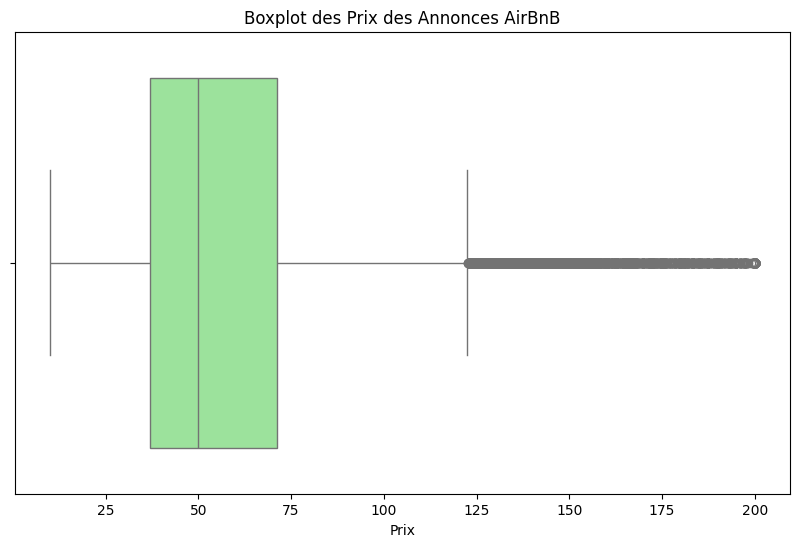

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dlc['price_per_person'], color='lightgreen')
plt.xlabel('Prix')
plt.title('Boxplot des Prix des Annonces AirBnB')
plt.show()

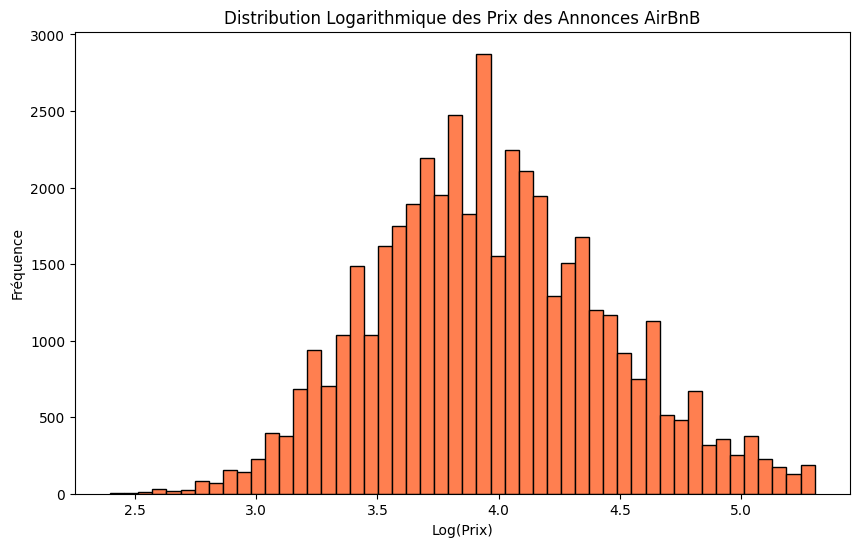

In [ ]:
prices_log = np.log1p(dlc['price_per_person'])  # Logarithme des prix

plt.figure(figsize=(10, 6))
plt.hist(prices_log, bins=50, color='coral', edgecolor='black')
plt.xlabel('Log(Prix)')
plt.ylabel('Fréquence')
plt.title('Distribution Logarithmique des Prix des Annonces AirBnB')
plt.show()

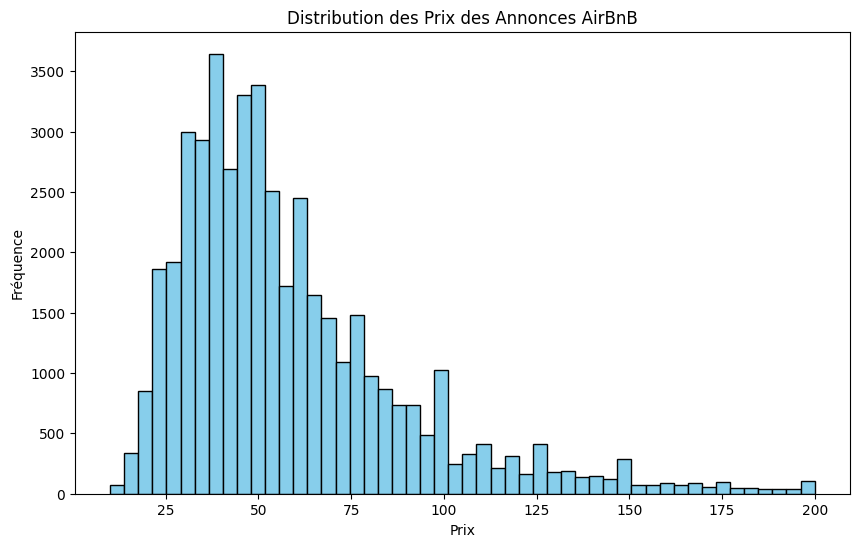

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dlc['price_per_person'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Distribution des Prix des Annonces AirBnB')
plt.show()

## pas utilisé

In [ ]:
# numérique + symbole
#Q1 = dlc['price'].quantile(0.25)
#Q3 = dlc['price'].quantile(0.75)
#IQR = Q3 - Q1

# Définition limites
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# supréssion les valeurs aberrantes
#dlc = dlc[(dlc['price'] >= lower_bound) & (dlc['price'] <= upper_bound)]
#dlc.shape
#dlc['price'].describe()
#print("Lower bound:", lower_bound)
#print("Upper bound:", upper_bound)##

Lower bound: -84.5
Upper bound: 407.5


#cleaning suite

In [ ]:
# Convertion booléennes
dlc['host_is_superhost'] = dlc['host_is_superhost'].map({'t': True, 'f': False})
dlc['instant_bookable'] = dlc['instant_bookable'].map({'t': True, 'f': False})

dlc['host_since'] = pd.to_datetime(dlc['host_since'])

In [ ]:
#Convertion
dlc = pd.get_dummies(dlc, columns=['property_type', 'room_type', 'neighbourhood_cleansed', 'host_identity_verified'], drop_first=True)

In [ ]:
dlc['host_days_active'] = (pd.to_datetime("today") - dlc['host_since']).dt.days

dlc = dlc.drop(columns=['host_since'])
print(dlc[['host_days_active']].head())

    host_days_active
0               5860
1               5737
2               5905
9               5546
10              5531


In [ ]:
X = dlc.drop(columns=['price'])
y = dlc['price'].astype(float)

In [ ]:
dlc

,id,host_id,host_is_superhost,accommodates,bedrooms,price,availability_365,number_of_reviews,review_scores_rating,review_scores_value,instant_bookable,price_per_person,property_type_Casa particular,property_type_Entire bed and breakfast,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire home/apt,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Farm stay,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in casa particular,property_type_Private room in condo,property_type_Private room in earthen home,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in houseboat,property_type_Private room in loft,property_type_Private room in rental unit,property_type_Private room in serviced apartment,property_type_Private room in tiny home,property_type_Private room in townhouse,property_type_Private room in vacation home,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Room in rental unit,property_type_Room in serviced apartment,property_type_Shared room in boutique hotel,property_type_Shared room in condo,property_type_Shared room in farm stay,property_type_Shared room in guesthouse,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in loft,property_type_Shared room in rental unit,property_type_Shared room in tiny home,property_type_Shared room in townhouse,property_type_Tiny home,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Buttes-Chaumont,neighbourhood_cleansed_Buttes-Montmartre,neighbourhood_cleansed_EntrepÃ´t,neighbourhood_cleansed_Gobelins,neighbourhood_cleansed_HÃ´tel-de-Ville,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,neighbourhood_cleansed_MÃ©nilmontant,neighbourhood_cleansed_Observatoire,neighbourhood_cleansed_OpÃ©ra,neighbourhood_cleansed_Palais-Bourbon,neighbourhood_cleansed_PanthÃ©on,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Popincourt,neighbourhood_cleansed_Reuilly,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Vaugirard,neighbourhood_cleansed_ÃlysÃ©e,host_identity_verified_t,host_days_active
0,3109,3631,False,2,1.0,113.0,297,4,5.00,5.00,True,56.50,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,5860
1,5396,7903,False,2,0.0,95.0,77,413,4.61,4.59,False,47.50,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,5737
2,7397,2626,True,4,2.0,145.0,316,360,4.73,4.74,False,36.25,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [ ]:
## Modifier pour dlcl ???

dlcl = dlc.drop(columns=['id', 'host_id', 'availability_365', 'instant_bookable', 'host_days_active' ])

In [ ]:
X = dlcl.drop(columns=['price', 'price_per_person'])
y = dlc['price_per_person']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#XGBoost

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 25.688723084341053
R²: 0.34674021786633746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# XGBoost
#model = xgb.XGBRegressor(random_state=42)

# hyperparamètres
#param_grid = {
    #'#n_estimators': [100, 200, 300],
    #'#learning_rate': [0.01, 0.1, 0.2],
    #'#max_depth': [4, 6, 8],
    #'#subsample': [0.8, 1.0],
    #'colsample_bytree': [0.7, 1.0]
#}

# Initialisation GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           #scoring='neg_mean_squared_error', cv=3, verbose=1)

# Training
#grid_search.fit(X_train, y_train)

#print("Meilleurs paramètres : ", grid_search.best_params_)
#print("Meilleure performance (négative MSE) : ", grid_search.best_score_)

In [ ]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, random_state=42, colsample_bytree=0.7)

# Entraîner le modèle
model.fit(X_train, y_train)

#Évaluation du modèle
y_pred = model.predict(X_test)

#métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 25.671677713340358
R²: 0.3476068519189047


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#Neural Network

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neurones
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.0005)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# modèle
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Utilisation d'une partie des données d'entraînement pour la validation
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Évaluation
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print("Mean Absolute Error (MAE) sur le test set:", mae)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


904/904 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2048.9197 - mae: 33.7769 - val_loss: 710.9811 - val_mae: 18.3164
Epoch 2/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 912.7888 - mae: 21.1482 - val_loss: 678.1452 - val_mae: 18.2491
Epoch 3/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 867.6352 - mae: 20.7557 - val_loss: 691.6630 - val_mae: 17.8599
Epoch 4/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 865.6248 - mae: 20.6051 - val_loss: 681.7562 - val_mae: 17.9336
Epoch 5/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 846.1856 - mae: 20.4576 - val_loss: 672.8928 - val_mae: 18.0551
Epoch 6/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 835.0927 - mae: 20.3342 - val_loss: 690.2081 - val_mae: 17.6827
Epoch 7/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 815.9540 - mae: 20.2272 - val_loss: 668.8557 - val_mae: 18.2900
Epoch 8/100
904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 824.9843 - mae: 20.1779 - val_loss: 672.7756 - val_mae: 17.7810
Epoch 9/100

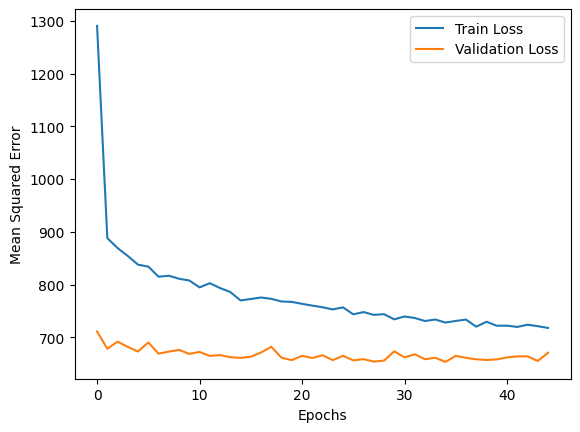

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

#Calculateur

In [ ]:
new_listing = {
    'room_type': 'Entire home/apt',
    'neighbourhood_cleansed': 'Gobelins',
    'accommodates': 4,
    'bedrooms': 2,
    'bathrooms': 1,
    'beds': 2,
    'host_is_superhost': 'f',
    'instant_bookable': 'f',
    'host_days_active': 365
}

new_listing_df = pd.DataFrame([new_listing])

new_listing_df = pd.get_dummies(new_listing_df, drop_first=True)

column_names = X.columns

for col in column_names:
    if col not in new_listing_df.columns:
        new_listing_df[col] = 0
new_listing_df = new_listing_df[column_names]

new_listing_df = scaler.transform(new_listing_df)

predicted_price = model.predict(new_listing_df)

print(f"Le prix suggéré pour cette annonce est : ${predicted_price[0][0]:.2f} par nuit.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Le prix suggéré pour cette annonce est : $48.57 par nuit.
